# Examination of Ensembles of Neural Networks #
##### Creator: Nathaniel Crosby #####
##### COSC: 247 Machine Learning, Amherst College #####

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import r2_score

`Here I import and normalize the Boston housing data which uses data about the home and neighborhood to determine its value.
I get the data from sklearn.datasets and standardize it with a MinMaxScalar.`

In [2]:
X_boston, y_boston = datasets.load_boston(return_X_y=True)
scaler = MinMaxScaler()
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.3, random_state=5)
    
X_train_boston = scaler.fit_transform(X_train_boston)
X_test_boston = scaler.transform(X_test_boston)

y_Scaler = MinMaxScaler()
y_train_boston = y_train_boston.reshape(-1,1)
y_test_boston = y_test_boston.reshape(-1,1)
y_train_boston = y_Scaler.fit_transform(y_train_boston)
y_test_boston = y_Scaler.transform(y_test_boston)

Boston_Eval_Data = []
Boston_Eval_Label = []

`This is a standard class for creating a single NN for the boston housing dataset.
It allows changing the training data, the number of hidden layers, the number of nodes, the number of epochs, and the regularization function`

In [3]:
def boston_NN(X=X_train_boston, y=y_train_boston, num_layers=1, epochs=500, num_nodes=None, regularizer=None):
    boston = tf.keras.models.Sequential()
    boston.add(tf.keras.layers.Dense(10, kernel_initializer='normal', activation='relu'))
    
    for i in range(num_layers):
        if(num_nodes != None):
            boston.add(tf.keras.layers.Dense(num_nodes[i], activation='relu', kernel_regularizer=regularizer))
        else:
            boston.add(tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizer))
    
    
    boston.add(tf.keras.layers.Dense(1))
    boston.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
    boston.fit(X, y, epochs=epochs, verbose=0)
    
    return boston

`This is a simple, one hidden layer NN trained on the boston housing data set and evaluated with R^2 on both training and test data. The time to train is also recorded.`

In [4]:
Time = time.time()

boston = boston_NN()

Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Single NN: Train Time")

y_test_pred_boston = boston.predict(X_test_boston)
y_train_pred_boston = boston.predict(X_train_boston)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Single NN: r2 Train Score")
Boston_Eval_Label.append("Single NN: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.8200437192310859
test r2:  0.7598018670963398


`This is also a simple NN but with 3 hidden layers`

In [5]:
Time = time.time()

boston = boston_NN(num_layers=3)

Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("3 Hidden Layer NN: Train Time")

y_test_pred_boston = boston.predict(X_test_boston)
y_train_pred_boston = boston.predict(X_train_boston)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("3 Hidden Layer NN: r2 Train Score")
Boston_Eval_Label.append("3 Hidden Layer NN: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.8210819815571164
test r2:  0.7645980336242739


`This is the standard majority voting ensemble. It is 20 NNs each with one hidden layer trained identically to the one above.`

In [6]:
#majority voting ensemble
Time = time.time()

clfs = []

for i in range(20):
    boston = boston_NN()
    clfs.append(boston)
    
Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Simple NN Ensemble: Train Time")

y_train_pred_boston = np.mean([clf.predict(X_train_boston) for clf in clfs], axis=0)
y_test_pred_boston = np.mean([clf.predict(X_test_boston) for clf in clfs], axis=0)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Simple NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Simple NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.8133422635398789
test r2:  0.7555462952971297


`This is a majority voting ensemble with bagging. I double the number of NNs in the ensemble because the training data for each NN is halved by bagging.`

In [7]:
#majority ensemble with bagging
Time = time.time()

clfs = []

for i in range(40):
    idx = np.random.randint(X_train_boston.shape[0], size = (int) (X_train_boston.shape[0] / 2))
    X_train_boston_, y_train_boston_ = X_train_boston[idx,:], y_train_boston[idx,:]

    boston = boston_NN(X=X_train_boston_, y=y_train_boston_)
    clfs.append(boston)

Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Bagging NN ensemble: Train Time")

y_train_pred_boston = np.mean([clf.predict(X_train_boston) for clf in clfs], axis=0)
y_test_pred_boston = np.mean([clf.predict(X_test_boston) for clf in clfs], axis=0)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Bagging NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Bagging NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.7629862029486227
test r2:  0.68116436761991


`This is an ensemble where I vary the activation functions of the different layers. It has slightly worse results than the standard NN but improves noticeably with size`

In [8]:
Time = time.time()

activations = ['relu', 'sigmoid', 'tanh'] #taking out softmax improved results...

clfs = []

for i in range(20): 
    boston = tf.keras.models.Sequential([
      tf.keras.layers.Dense(13, kernel_initializer='normal', activation=activations[np.random.randint(3)]),
      tf.keras.layers.Dense(25, activation=activations[np.random.randint(3)]),
      tf.keras.layers.Dense(1)
    ])
   
    boston.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
    boston.fit(X_train_boston, y_train_boston, epochs=100, verbose=0)
    clfs.append(boston)
    
Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Varied Activation NN ensemble: Train Time")

y_train_pred_boston = np.mean([clf.predict(X_train_boston) for clf in clfs], axis=0)
y_test_pred_boston = np.mean([clf.predict(X_test_boston) for clf in clfs], axis=0)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Varied Activation NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Varied Activation NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.5016984531163498
test r2:  0.4124959735944529


`Here is a majority voting ensemble with a varying number of nodes in the hidden layer of each NN.`

In [9]:
Time = time.time()

clfs = []

for i in range(20):
    num_nodes = np.random.randint(5,40)
    boston = boston_NN(num_nodes=[num_nodes])
    clfs.append(boston)
    
Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Varied # of Nodes NN ensemble: Train Time")

y_train_pred_boston = np.mean([clf.predict(X_train_boston) for clf in clfs], axis=0)
y_test_pred_boston = np.mean([clf.predict(X_test_boston) for clf in clfs], axis=0)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Varied # of Nodes NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Varied # of Nodes NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.814576630221038
test r2:  0.7544449376632718


`Here is a majority voting ensemble with a varying number of hidden layers in each NN.`

In [10]:
Time = time.time()

clfs = []

for i in range(20):
    num_layers = np.random.randint(1,4)
    boston = boston_NN(num_layers=num_layers)
    clfs.append(boston)
    
Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Varied # of layers NN ensemble: Train Time")

y_train_pred_boston = np.mean([clf.predict(X_train_boston) for clf in clfs], axis=0)
y_test_pred_boston = np.mean([clf.predict(X_test_boston) for clf in clfs], axis=0)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Varied # of layers NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Varied # of layers NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.8225530550891522
test r2:  0.7655082746887356


`This is an ensemble with varying regularization functions in the hidden layer.`

In [11]:
Time = time.time()

clfs = []

for i in range(20):
    regularizer=None
    rand = np.random.randint(0,2)
    if(rand==0):
        regularizer = tf.keras.regularizers.L1(0.01 + (np.random.random() / 50))
    elif (rand==1):
        regularizer = tf.keras.regularizers.L2(0.01 + (np.random.random() / 50))
    else:
        regularizer = tf.keras.regularizers.L1L2(0.01 + (np.random.random() / 50), 0.01 + (np.random.random() / 50))
        
    boston = boston_NN(regularizer=regularizer)
    clfs.append(boston)
    
Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Varied regularization NN ensemble: Train Time")

y_train_pred_boston = np.mean([clf.predict(X_train_boston) for clf in clfs], axis=0)
y_test_pred_boston = np.mean([clf.predict(X_test_boston) for clf in clfs], axis=0)

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Varied regularization NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Varied regularization NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.6179379315825697
test r2:  0.5161249603192143


`This is a stacking regressor where the output of each NN in the ensemble is fed into a final deciding NN which makes a final decision`

In [12]:
Time = time.time()

clfs = []

for i in range(20):
    boston = boston_NN()
    
    clfs.append(boston)
    
train_X = np.array([clf.predict(X_train_boston) for clf in clfs])

boston = tf.keras.models.Sequential([
      tf.keras.layers.Dense(20, kernel_initializer='normal', activation='relu'),
      tf.keras.layers.Dense(25, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

boston.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

boston.fit(train_X.T[0], y_train_boston, epochs=100, verbose=0)

Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Stacking NN ensemble: Train Time")

y_train_pred_boston = boston.predict(np.array([clf.predict(X_train_boston) for clf in clfs]).T[0])
y_test_pred_boston = boston.predict(np.array([clf.predict(X_test_boston) for clf in clfs]).T[0])

r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Stacking NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Stacking NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.8123154573816832
test r2:  0.7643238580157095


`This is a composite ensemble with all of the changes that seemed to provide some positive value: varying # of layers, varing # of nodes, and stacking.`

In [13]:
Time = time.time()

clfs = []

for i in range(20):
    num_layers = np.random.randint(1,4)
    num_nodes = [np.random.randint(5,40) for i in range(num_layers)]
    boston = boston_NN(num_layers=num_layers, num_nodes=num_nodes)
    clfs.append(boston)
    
train_X = np.array([clf.predict(X_train_boston) for clf in clfs])

boston = tf.keras.models.Sequential([
      tf.keras.layers.Dense(20, kernel_initializer='normal', activation='relu'),
      tf.keras.layers.Dense(25, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

boston.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
boston.fit(train_X.T[0], y_train_boston, epochs=100, verbose=0)

Boston_Eval_Data.append(time.time() - Time)
Boston_Eval_Label.append("Varied # of Nodes & layers Stacking NN ensemble: Train Time")

y_train_pred_boston = boston.predict(np.array([clf.predict(X_train_boston) for clf in clfs]).T[0])
y_test_pred_boston = boston.predict(np.array([clf.predict(X_test_boston) for clf in clfs]).T[0])


r2_train = r2_score(y_train_boston, y_train_pred_boston)
r2_test = r2_score(y_test_boston, y_test_pred_boston)
Boston_Eval_Data.append(r2_train)
Boston_Eval_Data.append(r2_test)
Boston_Eval_Label.append("Varied # of Nodes & layers Stacking NN ensemble: r2 Train Score")
Boston_Eval_Label.append("Varied # of Nodes & layers Stacking NN ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.8251466958465021
test r2:  0.7713583614440107


`This is the snail dataset. A regression dataset where I use physical measurements from the snail to determine its age.
I import it from csv, convert gender data to one-hot encoding and then standardize the X and y data.`

In [14]:
import pandas as pd

#Here I read in the snail data
#I have to transform the sex data from 'M', 'F' and 'I' into separate columns of 1s and 0s
#i.e it is one-hot encoding

df = pd.read_csv('SNAILDATA.csv')

a = df.to_numpy()
X = np.copy(a[:,:8])
y = np.copy(a[:,8].astype('float64'))

genders = np.zeros((y.shape[0], 3))
i = 0
for char in X[:,0]:
    if char == 'M':
        genders[i,0] = 1
    elif char == 'F':
        genders[i,1] = 1
    else:
        genders[i,2] = 1
    i+=1

#X = X.astype('float64')
X = np.append(X[:, 1:], genders, axis=1)

# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

#standardizing the data
sc = StandardScaler()
sc.fit(X_train)
X_train_snail = sc.transform(X_train)
X_test_snail = sc.transform(X_test)

sc_y = StandardScaler()
sc.fit(y_train[:, np.newaxis])
y_train_snail = sc.transform(y_train[:, np.newaxis]).flatten()
y_test_snail = sc.transform(y_test[:, np.newaxis]).flatten()

Snail_Eval_Data = []
Snail_Eval_Label = []

`Much like with the boston dataset, I create a standardized NN for the snail dataset to be used by the ensembles where I can change the data, the structure, and the regularization.`

In [15]:
def snail_NN(X=X_train_snail, y=y_train_snail, num_layers=1, num_nodes=None, regularizer=tf.keras.regularizers.L2(0.02)):
    snail = tf.keras.models.Sequential()
    snail.add(tf.keras.layers.Dense(10, kernel_initializer='normal', activation='relu'))
    
    for i in range(num_layers):
        if(num_nodes != None):
            snail.add(tf.keras.layers.Dense(num_nodes[i], activation='relu', kernel_regularizer=regularizer))
        else:
            snail.add(tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizer))
    
    
    snail.add(tf.keras.layers.Dense(1))
    snail.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
    snail.fit(X, y, epochs=100, verbose=0)
    
    return snail

`This is the single, one hidden layer NN`

In [16]:
Time = time.time()

snail = snail_NN()

Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Single NN: Train Time")

y_test_pred_snail = snail.predict(X_test_snail)
y_train_pred_snail = snail.predict(X_train_snail)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Single NN: r2 Train Score")
Snail_Eval_Label.append("Single NN: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.5959664397407128
test r2:  0.5714429133297372


`This is the single, 3 hidden layer NN`

In [17]:
Time = time.time()

snail = snail_NN(num_layers=3)

Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("# Hidden Layer NN: Train Time")

y_test_pred_snail = snail.predict(X_test_snail)
y_train_pred_snail = snail.predict(X_train_snail)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("3 Hidden Layer NN: r2 Train Score")
Snail_Eval_Label.append("3 Hidden Layer NN: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.5913415532106425
test r2:  0.5654409652050969


`This is the simple majority voting ensemble with 20 single, one hidden layer NNs.`

In [18]:
#majority voting ensemble
Time = time.time()

clfs = []

for i in range(20):
    snail = snail_NN()
    
    clfs.append(snail)
    
Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Simple NN Ensemble: Train Time")

y_train_pred_snail = np.mean([clf.predict(X_train_snail) for clf in clfs], axis=0)
y_test_pred_snail = np.mean([clf.predict(X_test_snail) for clf in clfs], axis=0)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Simple NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Simple NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.6001734594828625
test r2:  0.5725486591583173


`This is the bagging majority voting ensemble. I randomly select half of the data to train each NN on and therefore have 40 NNs instead of the usual 20.`

In [19]:
Time = time.time()

clfs = []

for i in range(40):
    idx = np.random.randint(X_train_snail.shape[0], size = (int) (X_train_snail.shape[0] / 2))
    X_train_snail_, y_train_snail_ = X_train_snail[idx,:], y_train_snail[idx]
    snail = snail_NN(X=X_train_snail_, y=y_train_snail_) 
    clfs.append(snail)

Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Bagging NN Ensemble: Train Time")

y_train_pred_snail = np.mean([clf.predict(X_train_snail) for clf in clfs], axis=0)
y_test_pred_snail = np.mean([clf.predict(X_test_snail) for clf in clfs], axis=0)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Bagging NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Bagging NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.5911366475438724
test r2:  0.5707859338795533


`This is an ensemble where I vary the the activation functions of the various layers of the NN.
It chooses randomly relu, sigmoid, or tanh.`

In [20]:
Time = time.time()

activations = ['relu', 'sigmoid', 'tanh'] #taking out softmax improved results...

clfs = []

for i in range(20): 
    snail = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, kernel_initializer='normal', activation=activations[np.random.randint(3)]),
      tf.keras.layers.Dense(20, activation=activations[np.random.randint(3)], kernel_regularizer=tf.keras.regularizers.L2(0.02)),
      tf.keras.layers.Dense(1)
    ])
    snail.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
    snail.fit(X_train_snail, y_train_snail, epochs=100, verbose=0)
    clfs.append(snail)
    
Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Varied Activation NN Ensemble: Train Time")

y_train_pred_snail = np.mean([clf.predict(X_train_snail) for clf in clfs], axis=0)
y_test_pred_snail = np.mean([clf.predict(X_test_snail) for clf in clfs], axis=0)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Varied Activation NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Varied Activation NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.5757045195649351
test r2:  0.5661356374428532


`This is a majority voting ensemble with a randomly varying number of nodes in hidden layer.`

In [21]:
Time = time.time()

clfs = []

for i in range(20):
    snail = snail_NN(num_nodes=[np.random.randint(5,40)])
    clfs.append(snail)

Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Varied # of Nodes NN Ensemble: Train Time")

y_train_pred_snail = np.mean([clf.predict(X_train_snail) for clf in clfs], axis=0)
y_test_pred_snail = np.mean([clf.predict(X_test_snail) for clf in clfs], axis=0)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Varied # of Nodes NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Varied # of Nodes NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.6000949390726877
test r2:  0.5726740483794129


`This is a majority voting ensemble with a randomly varying number of hidden layers.`

In [22]:
#majority voting ensemble with randomly varying # of hidden layers
Time = time.time()

clfs = []

for i in range(20):
    snail = snail_NN(num_layers=np.random.randint(1,4))
    clfs.append(snail)
    
Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Varied # of Layers NN Ensemble: Train Time")

y_train_pred_snail = np.mean([clf.predict(X_train_snail) for clf in clfs], axis=0)
y_test_pred_snail = np.mean([clf.predict(X_test_snail) for clf in clfs], axis=0)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Varied # of Layers NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Varied # of Layers NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.598934449913037
test r2:  0.5738119817300222


`This is an ensemble with randomly varying regularization functions.`

In [23]:
Time = time.time()

clfs = []

for i in range(20):
    regularizer=None
    rand = np.random.randint(0,2)
    if(rand==0):
        regularizer = tf.keras.regularizers.L1(0.02 + (np.random.random() / 50))
    elif (rand==1):
        regularizer = tf.keras.regularizers.L2(0.02 + (np.random.random() / 50))
    elif (rand==2):
        regularizer = tf.keras.regularizers.L1L2(0.02 + (np.random.random() / 50), 0.02 + (np.random.random() / 50))
    
    snail = snail_NN(regularizer=regularizer)
    clfs.append(snail)
    
Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Varied Regularization NN Ensemble: Train Time")

y_train_pred_snail = np.mean([clf.predict(X_train_snail) for clf in clfs], axis=0)
y_test_pred_snail = np.mean([clf.predict(X_test_snail) for clf in clfs], axis=0)

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Varied Regularization NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Varied Regularization NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.589267149120486
test r2:  0.5661024114794659


`This is a stacking ensemble with a final NN taking the output of each NN in the ensemble as input and giving a final output. The NNs are standard with one hidden layer.`

In [24]:
#Stacking ensemble
Time = time.time()

clfs = []

for i in range(20):
    snail = snail_NN()
    clfs.append(snail)
    
train_X = np.array([clf.predict(X_train_snail) for clf in clfs])

snail = tf.keras.models.Sequential([
      tf.keras.layers.Dense(20, kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.02)),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

snail.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

snail.fit(train_X.T[0], y_train_snail, epochs=100, verbose=0)

Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Stacking NN Ensemble: Train Time")

y_train_pred_snail = snail.predict(np.array([clf.predict(X_train_snail) for clf in clfs]).T[0])
y_test_pred_snail = snail.predict(np.array([clf.predict(X_test_snail) for clf in clfs]).T[0])

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Stacking NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Stacking NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.6006404684865942
test r2:  0.5745411067685304


`This is another composite ensemble where I randomly varying the number of hidden layers, number of nodes in each hidden layer, and I use stacking.`

In [25]:
#majority voting ensemble with randomly varying
Time = time.time()

clfs = []

for i in range(20):    
    num_layers = np.random.randint(1,4)
    num_nodes = [np.random.randint(5,40) for i in range(num_layers)]
    snail = snail_NN(num_layers=num_layers, num_nodes=num_nodes)    
    clfs.append(snail)
    
train_X = np.array([clf.predict(X_train_snail) for clf in clfs])

snail = tf.keras.models.Sequential([
      tf.keras.layers.Dense(20, kernel_initializer='normal', activation='relu'),
      tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.02)),
      tf.keras.layers.Dense(1)
    ])

snail.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

snail.fit(train_X.T[0], y_train_snail, epochs=100, verbose=0)

Snail_Eval_Data.append(time.time() - Time)
Snail_Eval_Label.append("Varied # of Nodes & Layers Stacking NN Ensemble: Train Time")

y_train_pred_snail = snail.predict(np.array([clf.predict(X_train_snail) for clf in clfs]).T[0])
y_test_pred_snail = snail.predict(np.array([clf.predict(X_test_snail) for clf in clfs]).T[0])

r2_train = r2_score(y_train_snail, y_train_pred_snail)
r2_test = r2_score(y_test_snail, y_test_pred_snail)
Snail_Eval_Data.append(r2_train)
Snail_Eval_Data.append(r2_test)
Snail_Eval_Label.append("Varied # of Nodes & Layers Stacking NN Ensemble: r2 Train Score")
Snail_Eval_Label.append("Varied # of Nodes & Layers Stacking NN Ensemble: r2 Test Score")
print("train r2: ", r2_train)
print("test r2: ", r2_test)

train r2:  0.5902816925126959
test r2:  0.565270145275611


`
This is the covertypes dataset from sklearn where the forest cover type of a particular section of forest is determined given geographical and environmental measurements.
I first import and then standardize the data.`

In [26]:
covertypes_X, covertypes_y = datasets.fetch_covtype(return_X_y=True)

covertypes_y -= 1
    
scaler = MinMaxScaler()
X_train_covertypes, X_test_covertypes, y_train_covertypes, y_test_covertypes = train_test_split(covertypes_X, covertypes_y, test_size=0.3, random_state=5)
    
X_train_covertypes = scaler.fit_transform(X_train_covertypes)
X_test_covertypes = scaler.transform(X_test_covertypes)

covertypes_X.shape
X_train_covertypes.shape

Covertypes_Eval_Data = []
Covertypes_Eval_Label = []

`This is another standard function to get a NN that will be used for the ensembles.`

In [27]:
def covertypes_NN(X=X_train_covertypes, y=y_train_covertypes, num_layers=1, num_nodes=None, regularizer=None):
    covertypes = tf.keras.models.Sequential()
    covertypes.add(tf.keras.layers.Dense(54, kernel_initializer='normal', activation='relu'))
    
    for i in range(num_layers):
        if(num_nodes!=None):
            covertypes.add(tf.keras.layers.Dense(num_nodes[i], activation='relu', kernel_regularizer=regularizer))
        else:
            covertypes.add(tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=regularizer))
                  
    covertypes.add(tf.keras.layers.Dense(7))
    covertypes.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    covertypes.fit(X, y, epochs=5, verbose=0)
    return covertypes

`This function takes the list of NNs in the ensemble and finds the train and test accuracy scores.`

In [28]:
def get_score(clfs):
    y_train_pred_covertypes = np.mean([clf.predict(X_train_covertypes) for clf in clfs], axis=0)
    y_test_pred_covertypes = np.mean([clf.predict(X_test_covertypes) for clf in clfs], axis=0)

    train_pred_vals = 0
    for val in range(y_train_pred_covertypes.shape[0]):
        if (y_train_pred_covertypes[val].argmax() == y_train_covertypes[val]):
            train_pred_vals+=1

    train_score = train_pred_vals / y_train_covertypes.shape[0]

    test_pred_vals = 0
    for val in range(y_test_pred_covertypes.shape[0]):
        if (y_test_pred_covertypes[val].argmax() == y_test_covertypes[val]):
            test_pred_vals+=1

    test_score = test_pred_vals / y_test_covertypes.shape[0]
    
    return train_score, test_score

`This is the standard single hidden layer NN.`

In [29]:
Time = time.time()
covertypes = covertypes_NN()
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Single NN: Train Time")

train_score = covertypes.evaluate(X_train_covertypes, y_train_covertypes)
test_score = covertypes.evaluate(X_test_covertypes, y_test_covertypes)

Covertypes_Eval_Data.append(train_score[1])
Covertypes_Eval_Label.append("Single NN: Train Accuracy")        
print("train score: ", train_score)

Covertypes_Eval_Data.append(test_score[1])
Covertypes_Eval_Label.append("Single NN: Test Accuracy")
print("test score: ", test_score)

5447/5447 [==============================] - 4s 734us/step - loss: 0.4873 - accuracy: 0.7894
train score:  [0.4853067994117737, 0.78998202085495]
test score:  [0.487295001745224, 0.789385199546814]


`This is the 3 hidden layer NN.`

In [30]:
Time = time.time()
covertypes = covertypes_NN(num_layers=3)
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("3 Hidden Layer NN: Train Time")

train_score = covertypes.evaluate(X_train_covertypes, y_train_covertypes)
test_score = covertypes.evaluate(X_test_covertypes, y_test_covertypes)

Covertypes_Eval_Data.append(train_score[1])
Covertypes_Eval_Label.append("3 Hidden Layer NN: Train Accuracy")        
print("train score: ", train_score)

Covertypes_Eval_Data.append(test_score[1])
Covertypes_Eval_Label.append("3 Hidden Layer NN: Test Accuracy")
print("test score: ", test_score)

5447/5447 [==============================] - 4s 753us/step - loss: 0.4547 - accuracy: 0.8072
train score:  [0.45427075028419495, 0.8074662685394287]
test score:  [0.45469018816947937, 0.8072218894958496]


`This is the standard majority voting ensemble with 20 standard NNs.`

In [31]:
Time = time.time()

clfs = []

for i in range(20):
    covertypes = covertypes_NN()
    clfs.append(covertypes)
    
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Simple NN Ensemble: Train Time")

train_score, test_score = get_score(clfs)

Covertypes_Eval_Data.append(train_score)
Covertypes_Eval_Label.append("Simple NN Ensemble: Train Accuracy")
print("train score: ", train_score)

Covertypes_Eval_Data.append(test_score)
Covertypes_Eval_Label.append("Simple NN Ensemble: Test Accuracy")
print("test score: ", test_score)

train score:  0.8012456111018225
test score:  0.8001308059482284


`This is the bagging majority voting ensemble with 40 standard NNs each trained on a random half of the dataset.`

In [32]:
Time = time.time()

clfs = []

for i in range(40):
    idx = np.random.randint(X_train_covertypes.shape[0], size = (int) (X_train_covertypes.shape[0] / 2))
    X_train_covertypes_, y_train_covertypes_ = X_train_covertypes[idx], y_train_covertypes[idx]

    covertypes = covertypes_NN(X=X_train_covertypes_, y=y_train_covertypes_)
    clfs.append(covertypes)
    
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Bagging NN Ensemble: Train Time")

train_score, test_score = get_score(clfs)

Covertypes_Eval_Data.append(train_score)
Covertypes_Eval_Label.append("Bagging NN Ensemble: Train Accuracy")
print("train score: ", train_score)
 
Covertypes_Eval_Data.append(test_score)
Covertypes_Eval_Label.append("Bagging NN Ensemble: Test Accuracy")
print("test score: ", test_score)

train score:  0.7789716455048831
test score:  0.7783642371947861


`This is an ensemble where the activation function of the hidden layers is randomized.`

In [33]:
Time = time.time()

activations = ['relu', 'sigmoid', 'tanh'] #taking out softmax improved results...

clfs = []

for i in range(20): 

    covertypes = tf.keras.models.Sequential([
      tf.keras.layers.Dense(54, kernel_initializer='normal', activation=activations[np.random.randint(3)]),
      tf.keras.layers.Dense(25, activation=activations[np.random.randint(3)]),
      tf.keras.layers.Dense(7)
    ])
   
    covertypes.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    covertypes.fit(X_train_covertypes, y_train_covertypes, epochs=5, verbose=0)
    
    clfs.append(covertypes)
    
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Varied Activation NN Ensemble: Train Time")

train_score, test_score = get_score(clfs)

Covertypes_Eval_Data.append(train_score)
Covertypes_Eval_Label.append("Varied Activation NN Ensemble: Train Accuracy")
print("train score: ", train_score)

Covertypes_Eval_Data.append(test_score)
Covertypes_Eval_Label.append("Varied Activation NN Ensemble: Test Accuracy")
print("test score: ", test_score)

train score:  0.7944200753366051
test score:  0.7936593537727189


`This is an ensemble where the # of nodes in the hidden layer is randomized.`

In [34]:
Time = time.time()

clfs = []

for i in range(20):
    num_nodes = np.random.randint(20,80)
    covertypes = covertypes_NN(num_nodes=[num_nodes]) 
    clfs.append(covertypes)
    
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Varied # of Nodes NN Ensemble: Train Time")

train_score, test_score = get_score(clfs)

Covertypes_Eval_Data.append(train_score)
Covertypes_Eval_Label.append("Varied # of Nodes NN Ensemble: Train Accuracy")
print("train score: ", train_score)

Covertypes_Eval_Data.append(test_score)
Covertypes_Eval_Label.append("Varied # of Nodes NN Ensemble: Test Accuracy")
print("test score: ", test_score)

train score:  0.8142500270464313
test score:  0.8129991279603451


`This is an ensemble where the # of hidden layers in randomized.`

In [35]:
Time = time.time()

clfs = []

for i in range(20):
    
    covertypes = covertypes_NN(num_layers=np.random.randint(1,4))
    clfs.append(covertypes)
    
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Varied # of Layers NN Ensemble: Train Time")

train_score, test_score = get_score(clfs)

Covertypes_Eval_Data.append(train_score)
Covertypes_Eval_Label.append("Varied # of Layers NN Ensemble: Train Accuracy")
print("train score: ", train_score)
 
Covertypes_Eval_Data.append(test_score)
Covertypes_Eval_Label.append("Varied # of Layers NN Ensemble: Test Accuracy")
print("test score: ", test_score)

train score:  0.8194011428346627
test score:  0.818432164494217


`This is an ensemble where the regularization function of the hidden layer is randomized.`

In [36]:
Time = time.time()

clfs = []

for i in range(20):
    regularizer=None
    
    rand = np.random.randint(0,2)
    if(rand==0):
        regularizer = tf.keras.regularizers.L1(0.01 + (np.random.random() / 50))
    elif (rand==1):
        regularizer = tf.keras.regularizers.L2(0.01 + (np.random.random() / 50))
    elif (rand==2):
        regularizer = tf.keras.regularizers.L1L2(0.01 + (np.random.random() / 50), 0.01 + (np.random.random() / 50))

    covertypes = covertypes_NN(regularizer=regularizer)
    clfs.append(covertypes)
    
Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Varied Regularization NN Ensemble: Train Time")

train_score, test_score = get_score(clfs)

Covertypes_Eval_Data.append(train_score)
Covertypes_Eval_Label.append("Varied Regularization NN Ensemble: Train Accuracy")
print("train score: ", train_score)

Covertypes_Eval_Data.append(test_score)
Covertypes_Eval_Label.append("Varied Regularization NN Ensemble: Test Accuracy")
print("test score: ", test_score)

train score:  0.7547405017850645
test score:  0.7537463282540848


`This is an ensemble that uses the stacking decision method.`

In [37]:
#stacking ensemble
Time = time.time()

clfs = []

for i in range(20):
    covertypes = covertypes_NN()
    clfs.append(covertypes)
    
train_X = np.array([clf.predict(X_train_covertypes) for clf in clfs])

data = np.zeros((train_X.shape[0], train_X.shape[2], train_X.shape[1]))
for i in range(train_X.shape[0]):
    data[i] = train_X[i].T
    
data = data.T
covertypes = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=data[0].shape),
      tf.keras.layers.Dense(25, activation='relu'),
      tf.keras.layers.Dense(7)
    ])

covertypes.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

covertypes.fit(data, y_train_covertypes, epochs=10, verbose=0)

Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Stacking NN Ensemble: Train Time")

In [38]:
train_data = np.array([clf.predict(X_train_covertypes) for clf in clfs])
test_data = np.array([clf.predict(X_test_covertypes) for clf in clfs])
train_data_t = np.zeros((train_data.shape[0], train_data.shape[2], train_data.shape[1]))
test_data_t = np.zeros((test_data.shape[0], test_data.shape[2], test_data.shape[1]))

for i in range(test_data.shape[0]):
    train_data_t[i] = train_data[i].T
    test_data_t[i] = test_data[i].T

train_score = covertypes.evaluate(train_data_t.T, y_train_covertypes)
Covertypes_Eval_Data.append(train_score[1])
Covertypes_Eval_Label.append("Stacking NN Ensemble: Train Accuracy")
print("train score: ", train_score)

test_score = covertypes.evaluate(test_data_t.T, y_test_covertypes)
Covertypes_Eval_Data.append(test_score[1])
Covertypes_Eval_Label.append("Stacking NN Ensemble: Test Accuracy")
print("test score: ", test_score)

12710/12710 [==============================] - 6s 467us/step - loss: 0.4378 - accuracy: 0.8100
train score:  [0.4377620220184326, 0.8099570274353027]
5447/5447 [==============================] - 4s 744us/step - loss: 0.4414 - accuracy: 0.8083
test score:  [0.44143301248550415, 0.8083406090736389]


`This is the composite ensembles that varies the # of layers and nodes in each layer. It also uses stacking.`

In [39]:
Time = time.time()

clfs = []

for i in range(20):
    num_layers = np.random.randint(1,4)
    num_nodes = [np.random.randint(20, 60) for i in range(num_layers)]
    covertypes = covertypes_NN(num_layers=num_layers, num_nodes=num_nodes)
    
    clfs.append(covertypes)
    
train_X = np.array([clf.predict(X_train_covertypes) for clf in clfs])

data = np.zeros((train_X.shape[0], train_X.shape[2], train_X.shape[1]))
for i in range(train_X.shape[0]):
    data[i] = train_X[i].T
    
data=data.T

covertypes = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=data[0].shape),
      tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.02)),
      tf.keras.layers.Dense(7)
    ])

covertypes.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

covertypes.fit(data, y_train_covertypes, epochs=10, verbose=0)

Covertypes_Eval_Data.append(time.time() - Time)
Covertypes_Eval_Label.append("Varied # of Nodes & Layers Stacking NN Ensemble: Train Time")

In [40]:
train_data = np.array([clf.predict(X_train_covertypes) for clf in clfs])
test_data = np.array([clf.predict(X_test_covertypes) for clf in clfs])
train_data_t = np.zeros((train_data.shape[0], train_data.shape[2], train_data.shape[1]))
test_data_t = np.zeros((test_data.shape[0], test_data.shape[2], test_data.shape[1]))

for i in range(test_data.shape[0]):
    train_data_t[i] = train_data[i].T
    test_data_t[i] = test_data[i].T

train_score = covertypes.evaluate(train_data_t.T, y_train_covertypes)
test_score = covertypes.evaluate(test_data_t.T, y_test_covertypes)
        
Covertypes_Eval_Data.append(train_score[1])
Covertypes_Eval_Label.append("Varied # of Nodes & Layers Stacking NN Ensemble: Train Accuracy")
print("train score: ", train_score)
        
Covertypes_Eval_Data.append(test_score[1])
Covertypes_Eval_Label.append("Varied # of Nodes & Layers Stacking NN Ensemble: Test Accuracy")
print("test score: ", test_score)

5447/5447 [==============================] - 4s 754us/step - loss: 0.4111 - accuracy: 0.8386
train score:  [0.40879157185554504, 0.8401703238487244]
test score:  [0.41109272837638855, 0.8386210203170776]


`Below I do an analysis of the data where I plot the training time, train score, and test score of each ensemble for each dataset. The lowest value is highlighted red and the highest is highlighted green.`

In [41]:
import matplotlib.pyplot as plt
from statistics import mean

def analyze(data, label, Data_Title):
    train_times, time_labels = [], []
    train_score, train_labels = [], []
    test_score, test_labels = [], []

    i = len(data) - 1
    while (i >= 0):
        if (i%3 == 2):
            test_score.append(data.pop(i))
            test_labels.append(label.pop(i))
        elif(i%3 == 1):
            train_score.append(data.pop(i))
            train_labels.append(label.pop(i))
        else:
            train_times.append(data.pop(i))
            time_labels.append(label.pop(i))
        i-=1

    def plot(x, y, data_type):
        x_loc = np.arange(len(x))

        fig, ax = plt.subplots(figsize=(10,20))
        fig.suptitle(Data_Title + data_type, fontsize=16)
        
        cc = ['blue'] * len(x)
        for i, v in enumerate(x):
            ax.text(v, i , str(round(v, 2)), color='black', fontweight='bold')
            if(v == max(x)):
                cc[i] = 'green'
            elif(v == min(x)):
                cc[i] = 'red'
                
        ax.barh(x_loc, x, align='center', color=cc)
        ax.set_yticks(x_loc)
        ax.set_yticklabels(y, fontweight='bold')

        plt.show()

    plot(train_times, time_labels, ': Train Times (seconds)')
    plot(train_score, train_labels, ': Train Scores')
    plot(test_score, test_labels, ': Test Scores')

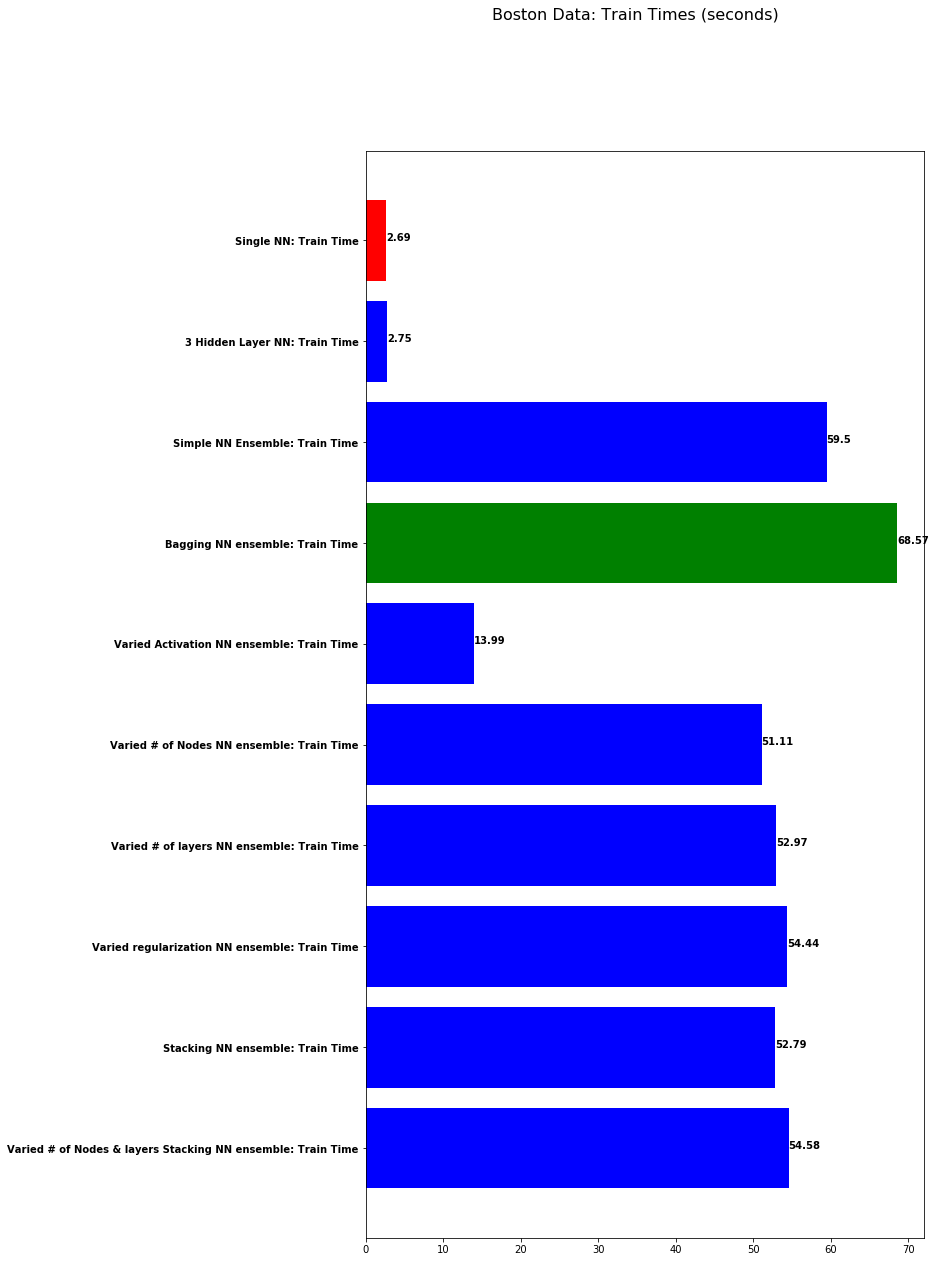

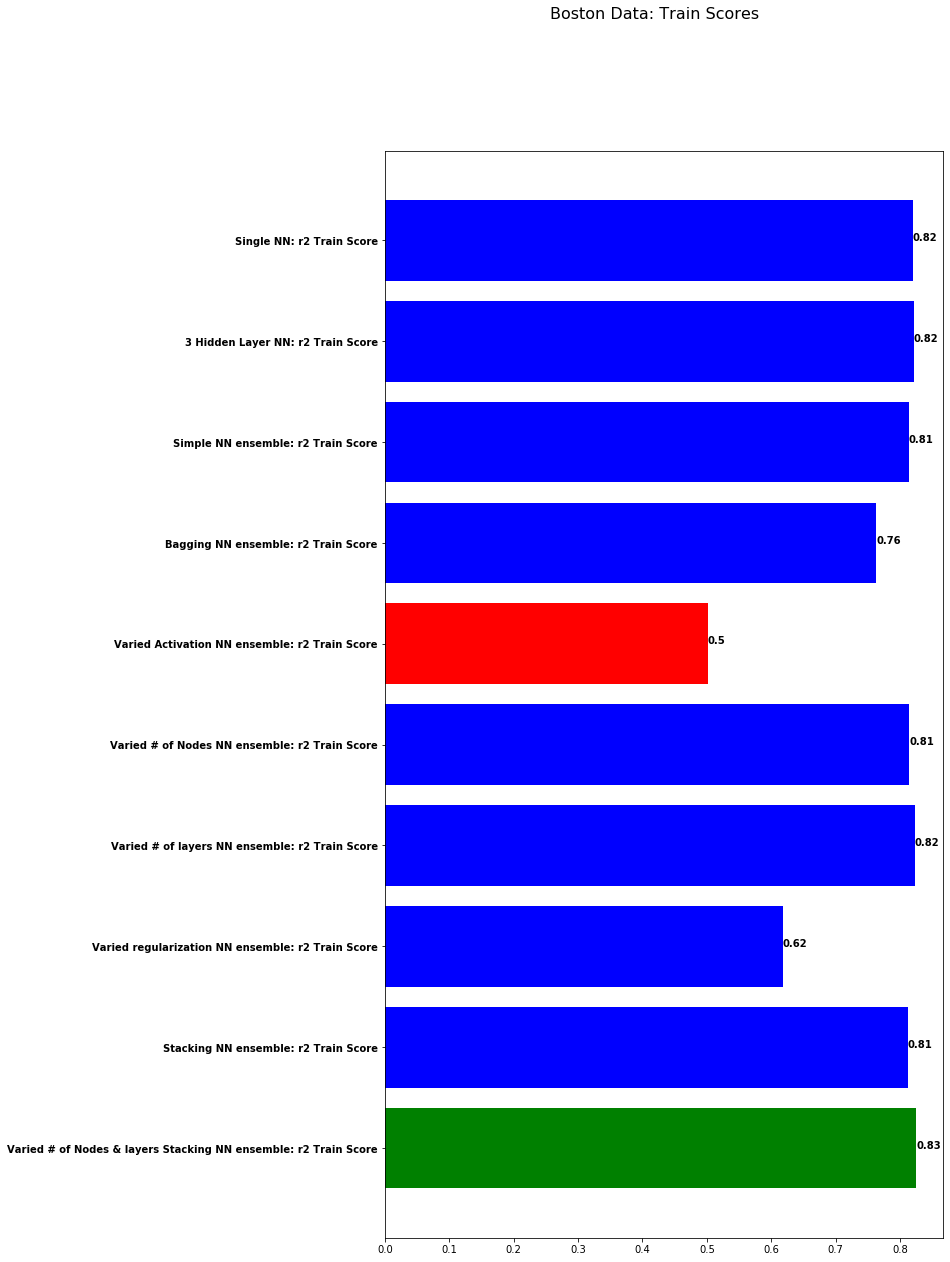

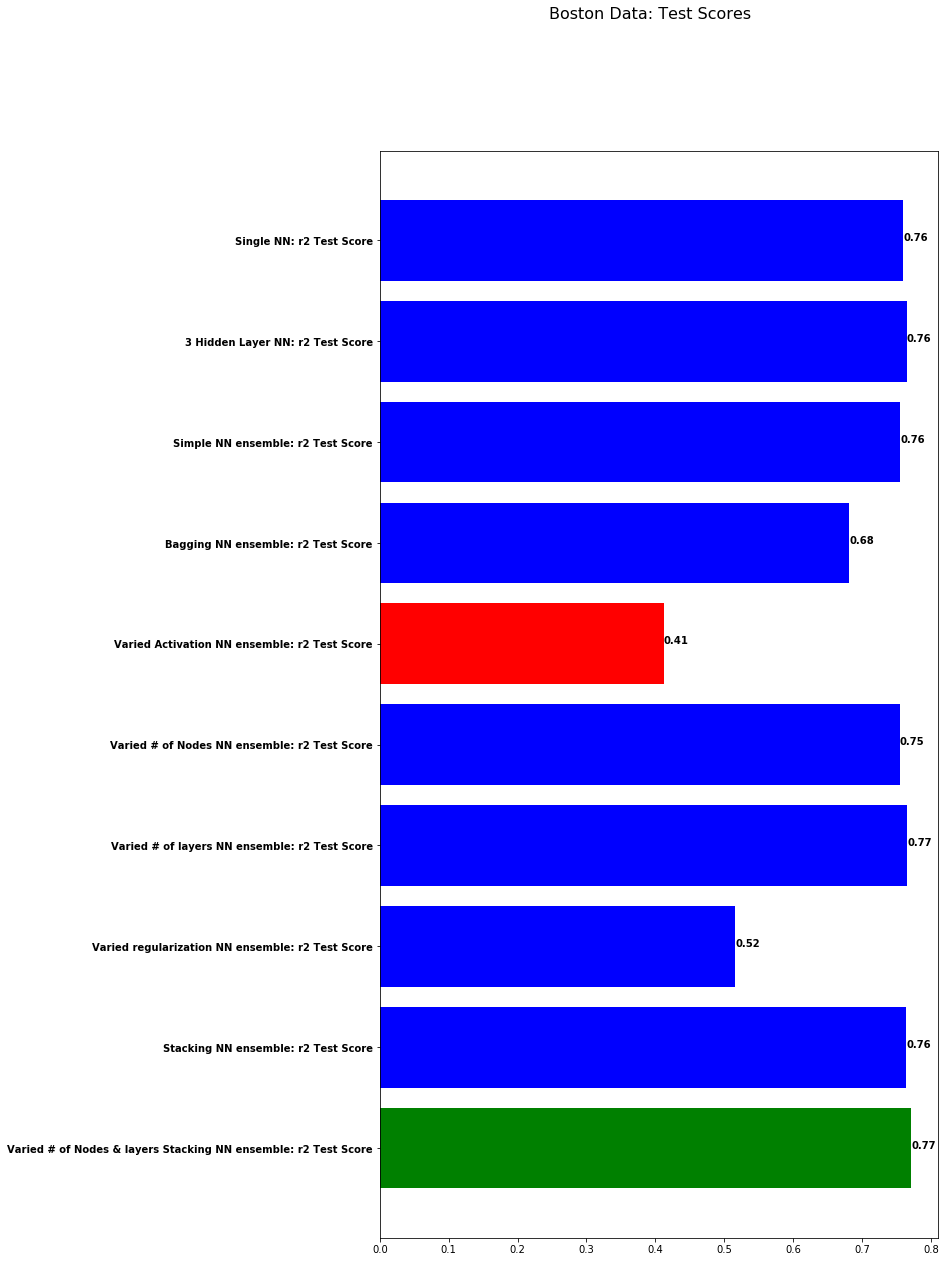

In [42]:
data = Boston_Eval_Data.copy()
label = Boston_Eval_Label.copy()

analyze(data, label, 'Boston Data')

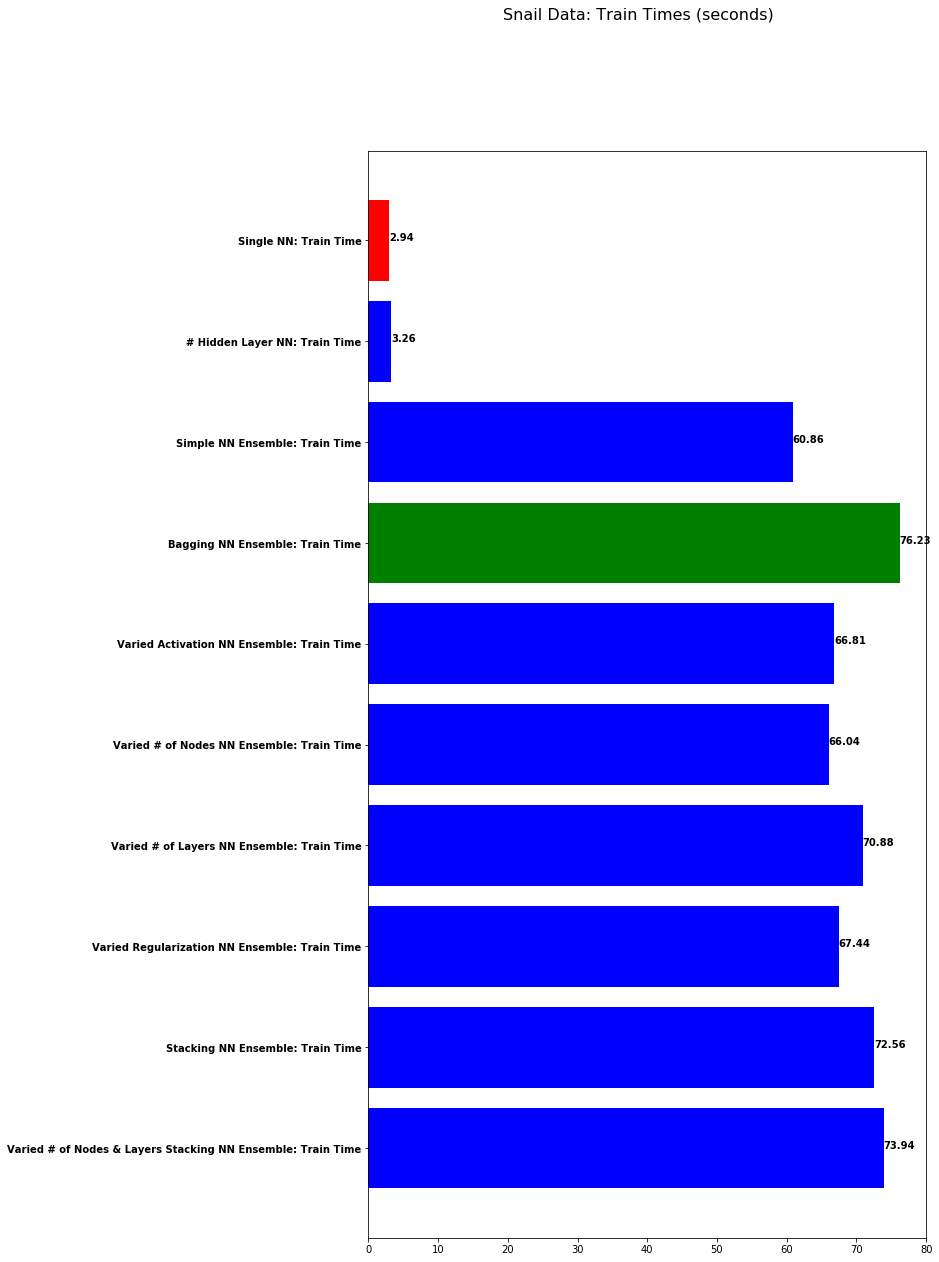

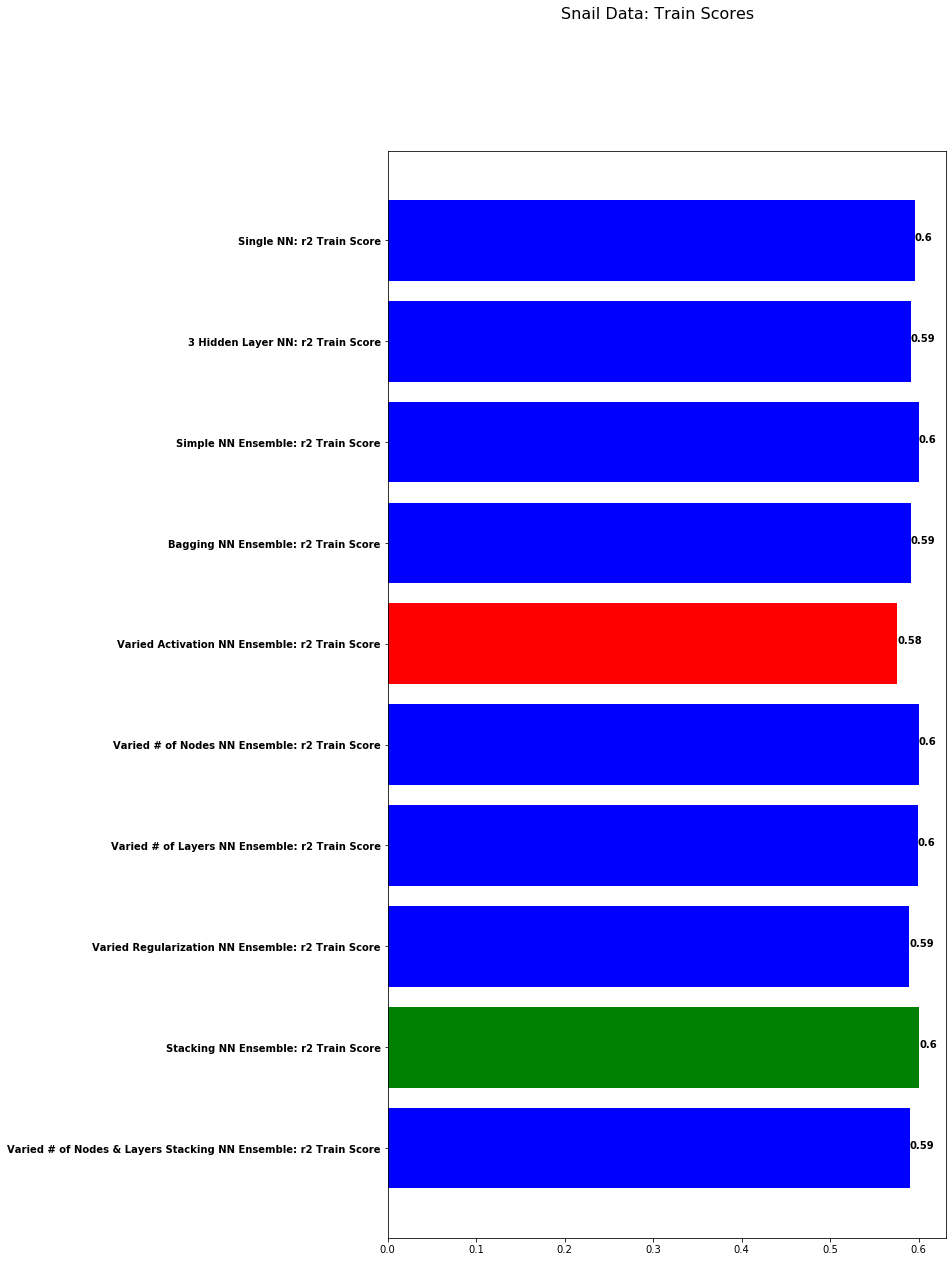

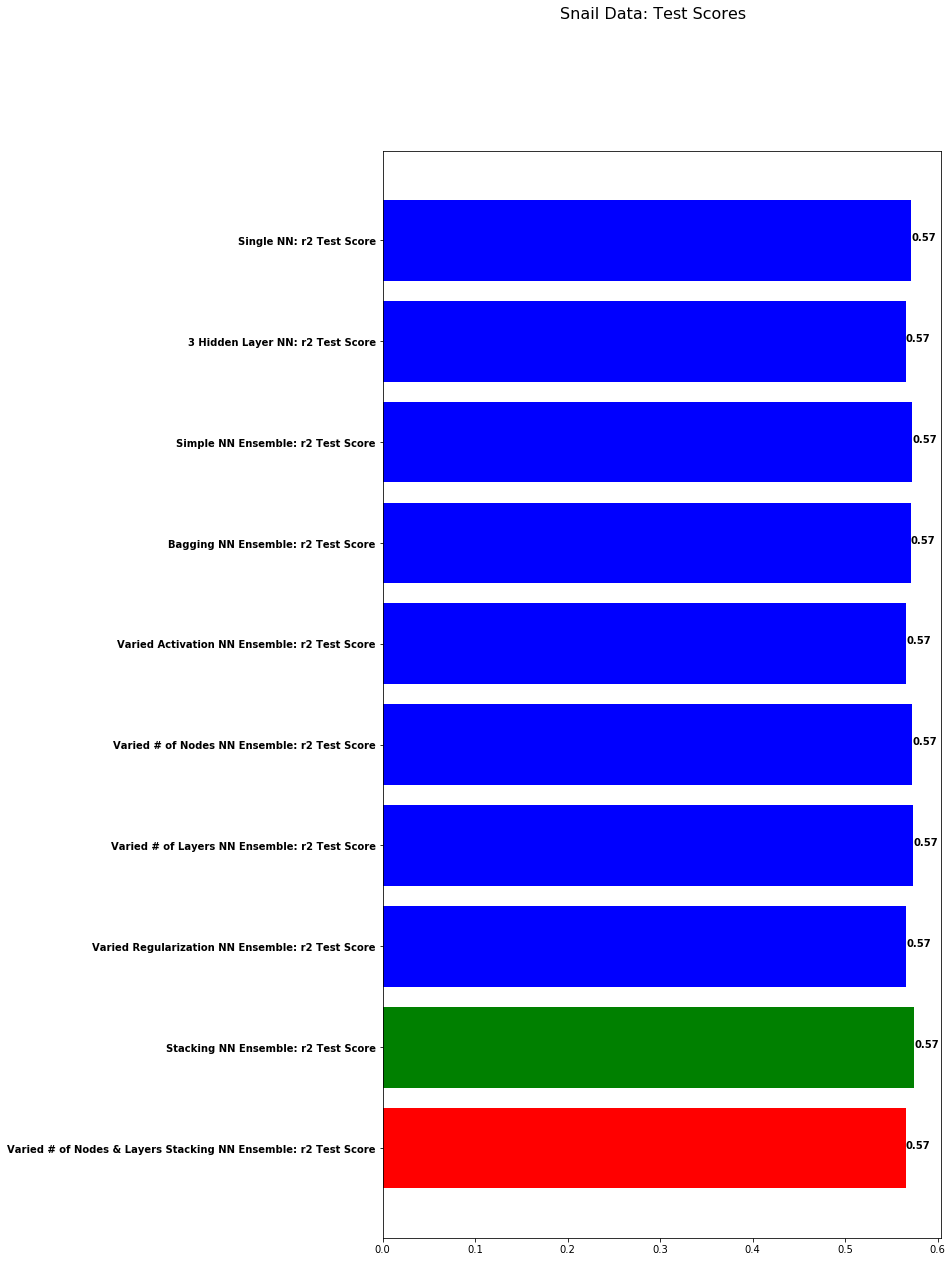

In [43]:
data = Snail_Eval_Data.copy()
label = Snail_Eval_Label.copy()

analyze(data, label, 'Snail Data')

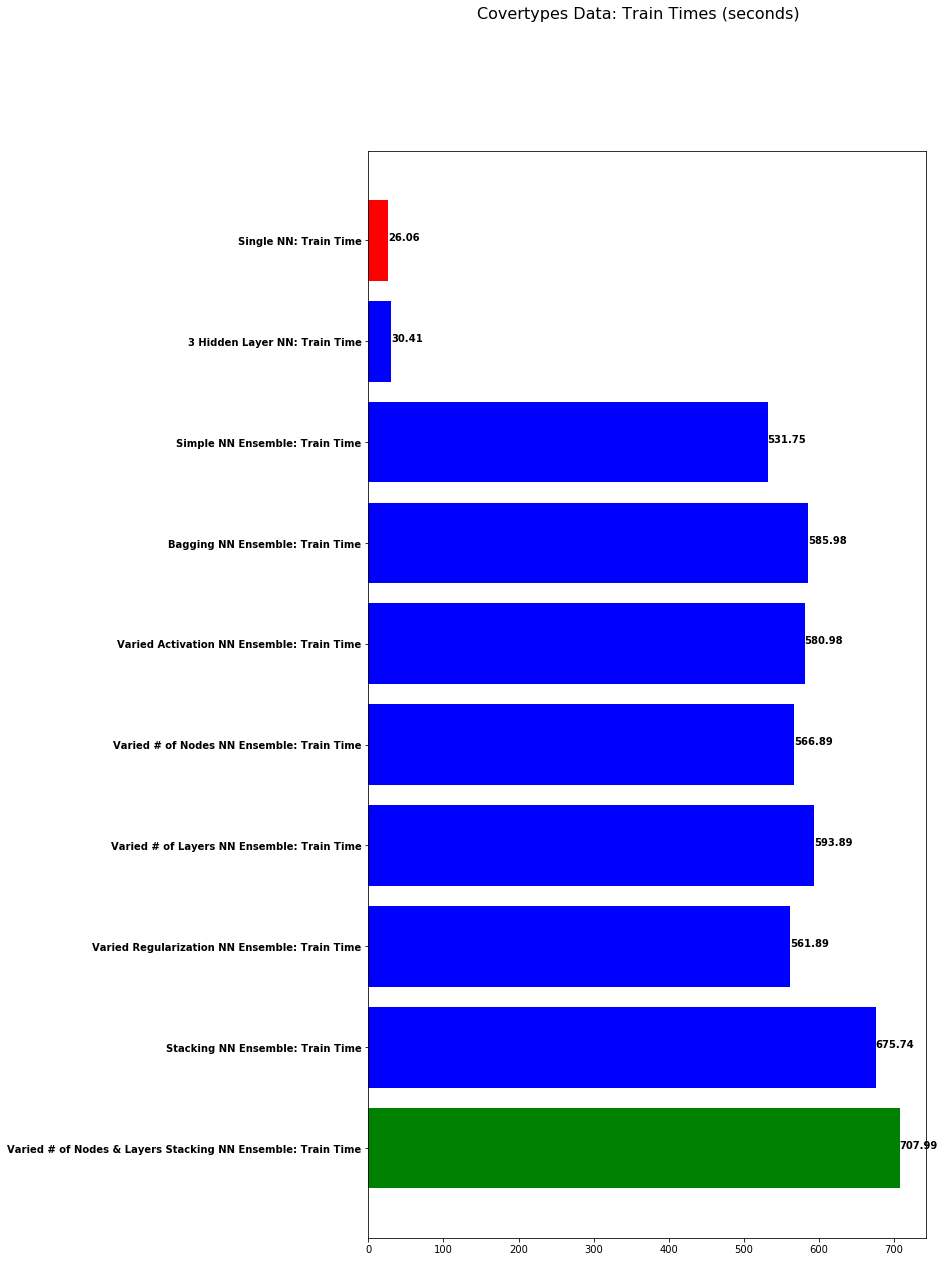

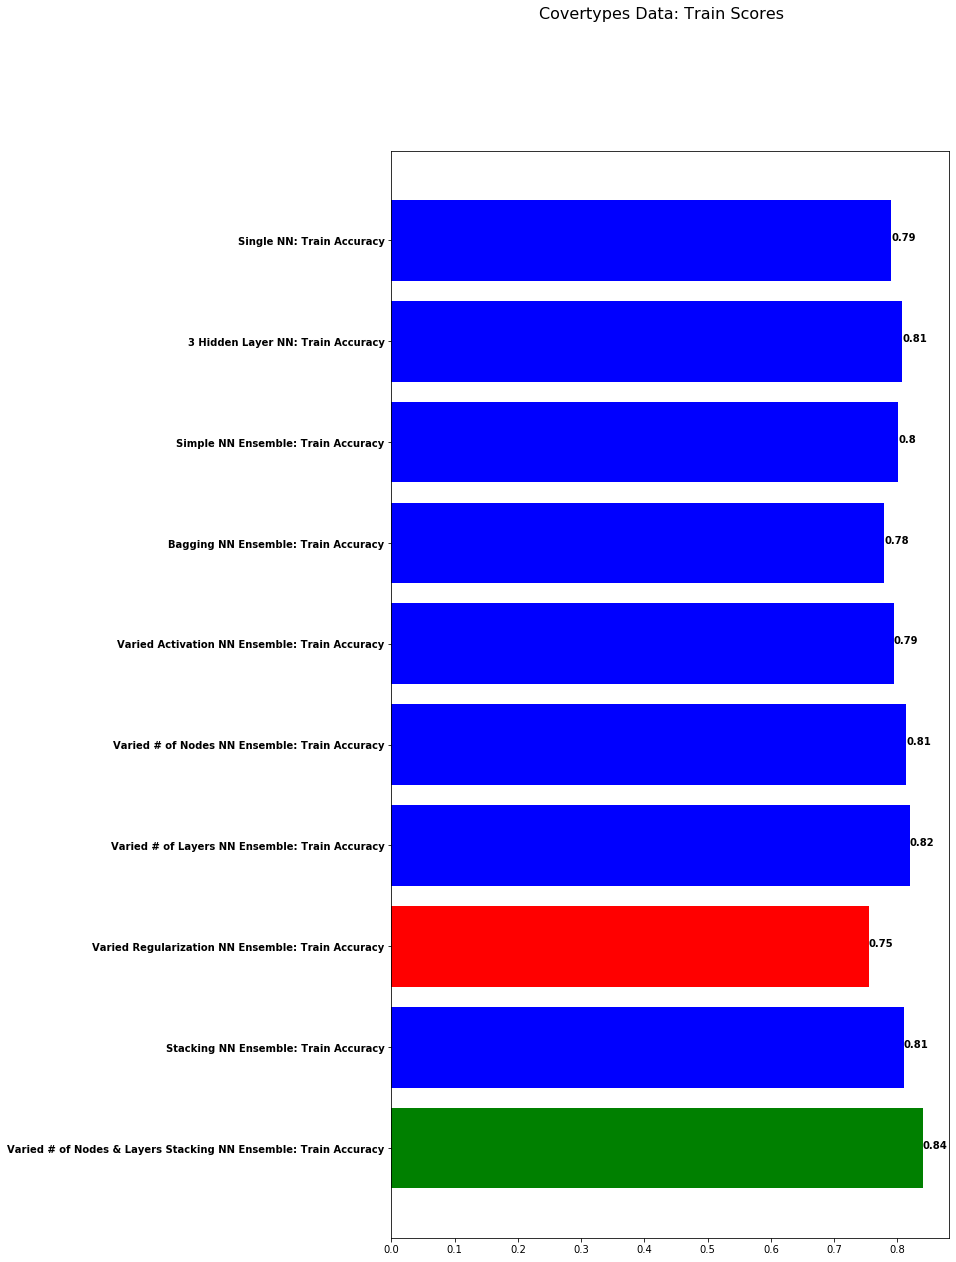

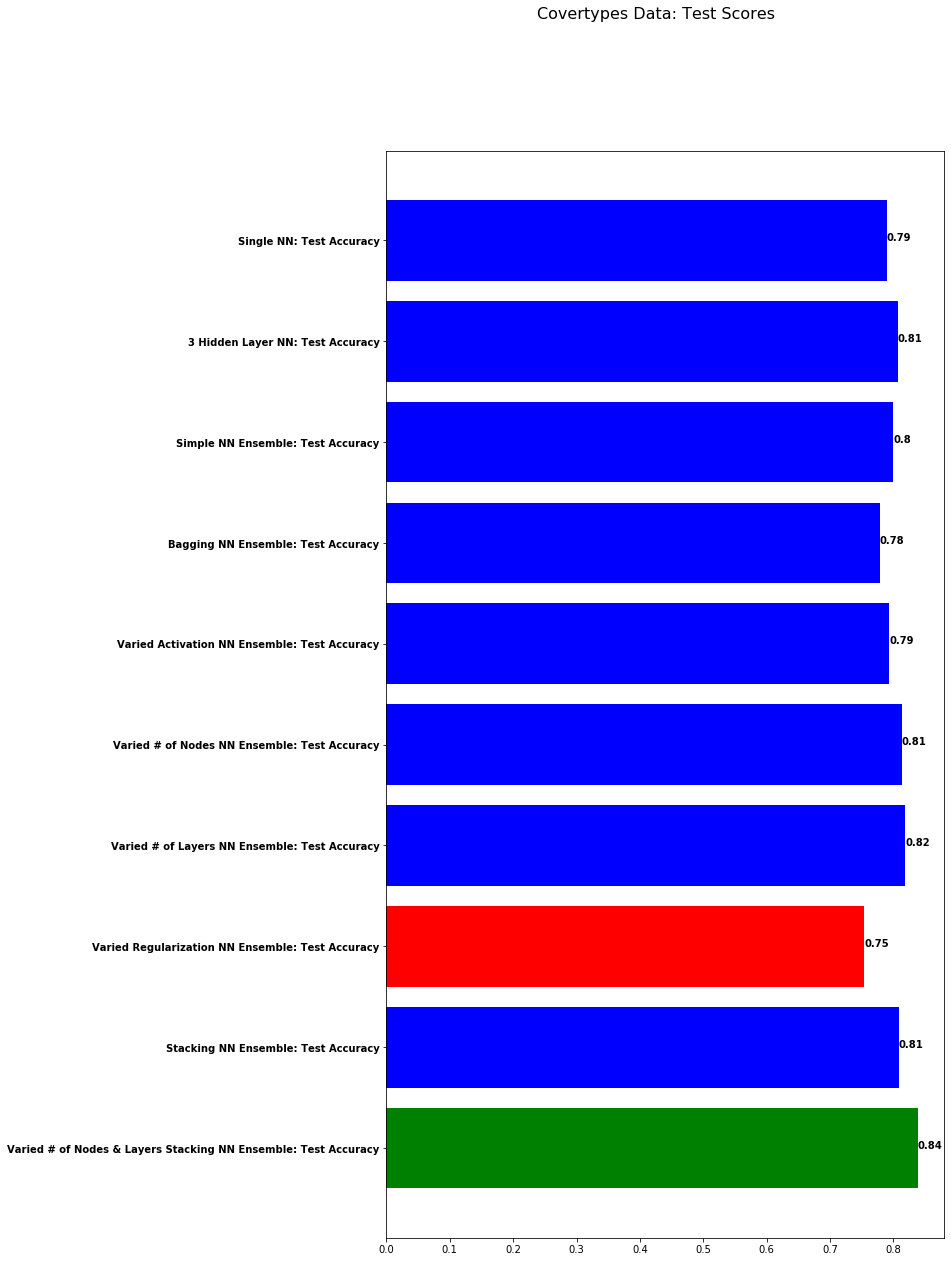

In [44]:
data = Covertypes_Eval_Data.copy()
label = Covertypes_Eval_Label.copy()

analyze(data, label, 'Covertypes Data')

## Analysis and Conclusion ##

After testing a variety of different ensembles and some have shown to provide a slight advantage while others actually worsened results. To begin with, when comparing the initial increase from a single NN to an ensemble of 20, there is a significant increase in training time (about 20x, which is expected). This additional computational cost is significant, but it did typically provide improved results, but not for than a few percent. It is arguable if this huge increase in time is worthwhile, and it will certainly depend on the task. In fact, on the boston dataset, a deeper NN (3 hidden layers) is more successful and easier to train than an ensemble. However, with the other datasets, this is not the case. The following two datasets are both larger and more complex than the boston dataset, which seems to be advantageous toward the ensembles.
    
A few ensemble types consistently performed worse than even a single NN and these were: bagging, varied regularization, and varied activation functions. It was surprising to see bagging perform so poorly because it is a well established method used for other machine learning algorithms such as with forests. It was not as surprising to see varied regularizating and activation function perform poorly because these tend to be most effective when well tuned and not when randomized. It probably added more noise as some of the NNs in the ensemble were likely were poorly trained.
    
Contrarily, some of the ensembles seemed to provide at least some value. These were the ensembles that had a varied number of layers and varied number of nodes in the activation layers. This makes some sense because all of the ensembles will be trained well, but will be materially different meaning than the others and can together be more effective than a single NN. Another method that provided a lot of value was stacking instead of majority voting where a final single NN took in as inputs, the outputs of all the other NNs in the ensemble. It makes sense that this is more effective than simply majority voting because it is a more sophisticated composition of the outputs and will be able to rely more heavily of the best trained models. When all 3 of these advantages are put together, it tended to be more effective than any of the other ensembles. This is especially true for the covertypes dataset where the model gets about 3% more classifications correct than any other ensemble.
    
There is certainly room for more exploration in this area, with more types of datasets and more diverse changes. Perhaps a much larger ensemble would provide unexpectedly good results. However, I was limited by the capabilities if my computer. Given the limited benefit of the ensembles in general, I suspect it is more worthwhile to develop single NNs the vast majority of the time and that one can just make that single NN more complex if that is needed.
